# Local field potential
## Exercise 2

First import all the libraries and the lfp data.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
from scipy import signal
sys.path.append(os.path.abspath("code"))

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})

In [19]:
with open('01-local_field_potential/data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Use the continuous wavelet transform (cwt) from pywavelets (pywt) to plot the spectograms from the 15 to 17 second period.
Firts plot is with mexican hat transform, second using a first order gaussian and the last is done with morlet.

Text(0, 0.5, 'frequency (kHz)')

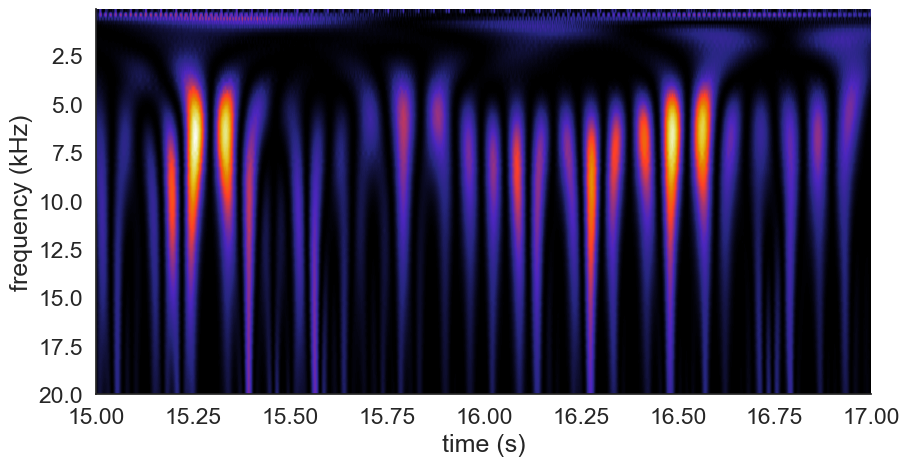

In [23]:
from pywt import scale2frequency
from pywt import cwt

start = 15
end = 17

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.xlabel('time (s)')
plt.ylabel('frequency (kHz)')

Text(0, 0.5, 'frequency (kHz)')

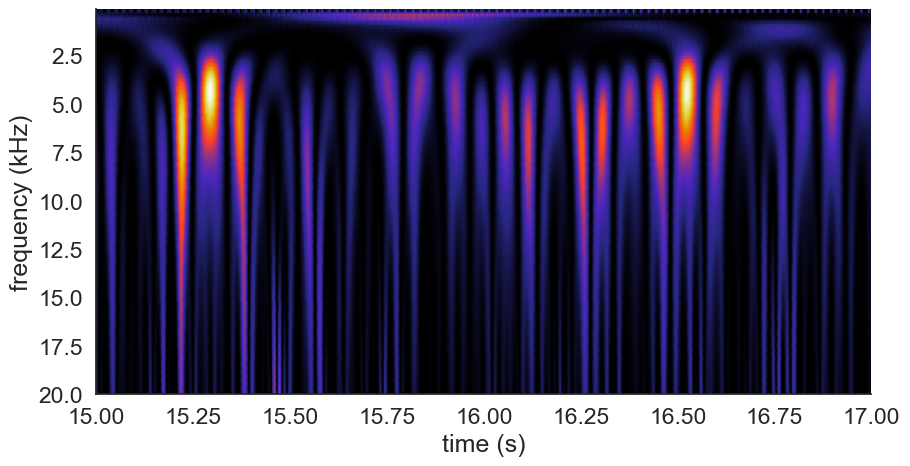

In [24]:
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.xlabel('time (s)')
plt.ylabel('frequency (kHz)')

Text(0, 0.5, 'frequency (kHz)')

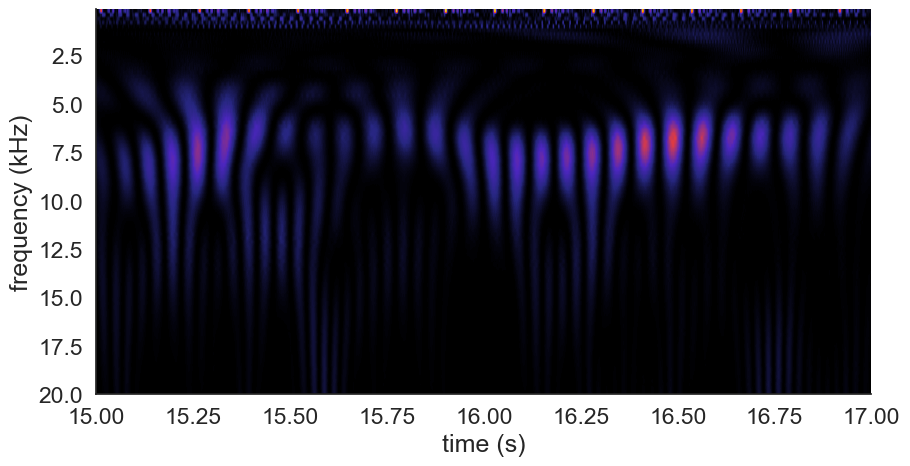

In [25]:
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.xlabel('time (s)')
plt.ylabel('frequency (kHz)')

Now plotting the sectrogram using the complex morlet wavelet with bandwith 1.5 kHz and center frequency 1.0 kHz.

Text(0, 0.5, 'frequency (kHz)')

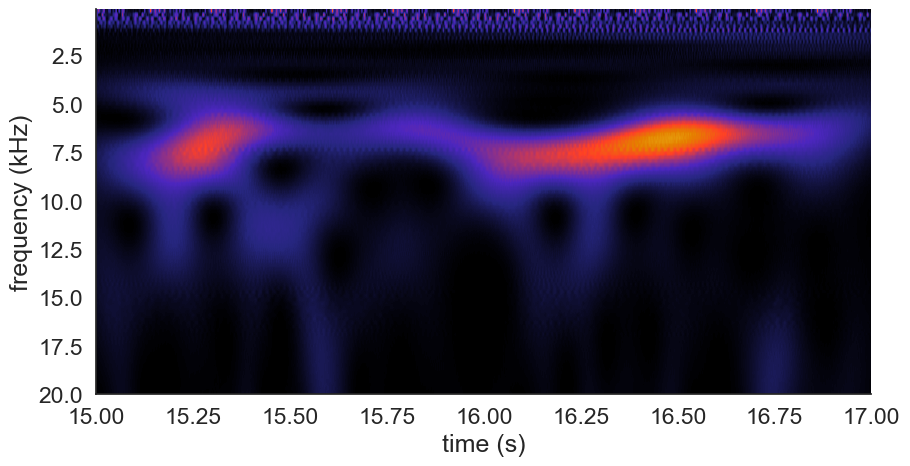

In [27]:
frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'cmor1.5-1.0'

scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.xlabel('time (s)')
plt.ylabel('frequency (kHz)')

When comparing the spectogram of the complex morlet with the other three spectograms the spectrum looks more continuous for the comples morlet. When looking at the definitions of the wavelets this makes sense since the complex morlet is the only one with a second exponential in the definition which results in the smoother spectrogram. 